In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load CSV
train = pd.read_csv(r'C:\Users\ADMIN\Downloads\MNIST_Train.csv')
test  = pd.read_csv(r'C:\Users\ADMIN\Downloads\mnist_test.csv')

In [26]:
# Split features and labels
x_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values   # corrected
x_test  = test.iloc[:, 1:].values
y_test  = test.iloc[:, 0].values

In [27]:
# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

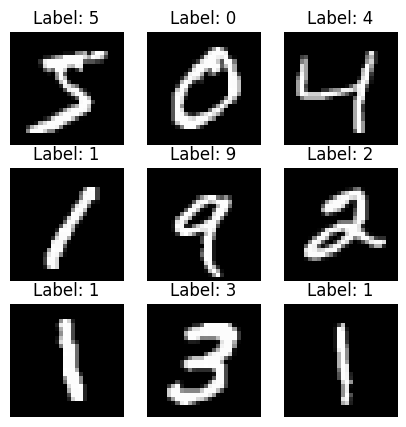

In [28]:
# Visualize some samples
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [29]:
# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras import models, layers
tf.get_logger().setLevel('ERROR')

In [30]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [31]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Train
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 36s 18ms/step - loss: 0.1460 - accuracy: 0.9562 - val_loss: 0.0494 - val_accuracy: 0.9833
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.0361 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0305 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0374 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0303 - val_accuracy: 0.9907


In [33]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 - 2s - loss: 0.0303 - accuracy: 0.9907 - 2s/epoch - 7ms/step
✅ Test Accuracy: 0.9907


In [34]:
# Save model
model.save(r"E:\MNIST_cnn_Project\mnist_cnn.h5")